[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ianjure/titanic-survivor-prediction/blob/main/Titanic_Survivor_Prediction_Notebook.ipynb)

**Author:** Ian Jure Macalisang

**Email:** ianjuremacalisang2@gmail.com

**Link:** https://github.com/ianjure/titanic-survivor-prediction

**Website:** https://canyousurvivethetitanic.streamlit.app/

**NOTE**: UPLOAD **[train.csv](https://www.kaggle.com/competitions/titanic/data)** FIRST!

# **I. Overview**

**Dataset Features:**

*   Survival - Did the passenger survive?
*   Pclass - Passenger's ticket class
*   Sex - Male or Female
*   Age - Passenger's age in years
*   Sibsp - Number of siblings/spouses aboard the Titanic
*   Parch - Number of parents/children aboard the Titanic
*   Ticker - Passenger's ticket number
*   Fare - Passenger's fare amount
*   Cabin - Passenger's cabin number
*   Embarked - Passenger's port of embarkation











# **II. Importing and Exploring the Data**

In [3]:
import pandas as pd

# SHOW ALL COLUMNS
pd.options.display.max_columns = None

In [4]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# STANDARD INFORMATION
print(data.describe(), '\n')

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   



In [ ]:
# CHECKING IF DATASET IS BALANCED
survived = data[data['Survived'] == 1]
dead = data[data['Survived'] == 0]
percentage = len(survived)/float(len(dead))

print(f'Survived / Dead Percentage: {percentage * 100 :.3f}%')
print(f'Survived: {len(survived)}')
print(f'Dead: {len(dead)}')

Survived / Dead Percentage: 62.295%
Survived: 342
Dead: 549


When dealing with an ubalanced dataset, a common way to solve it is to use a resampling technique:

**Undersampling** - balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

**Oversampling** - is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique)

Note that there is no absolute advantage of one resampling method over another. Application of these two methods depends on the use case it applies to and the dataset itself. A combination of over- and under-sampling is often successful as well.

Since our dataset is quite balanced, we don't need to resample it.

In [ ]:
# CHECKING NULL VALUES
print(data.isnull().sum(), '\n')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



The age, cabin, and embarked columns have missing values.

Common ways to handle this:
*   Remove rows with missing values **(Dropping / Deleting)**
*   Replacing missing values with estimated values **(Imputation)**
*   Replace missing values with the previous or next non-missing value in the same column **(Forward / Backward Fill)**
*   Estimate missing values based on surrounding data points **(Interpolation)**

**Age** - We will use KNN Imputer (K-Nearest Neighbors) to handle this.

**Cabin** - We will fill the missing values with an initial value.

**Embarked** - Since there are only 2 missing values, we can just drop these rows.





# **III. Preprocessing the Data**

Preprocessing the data will help us improve the quality of our data. It will also help us find and create new features that we will use in the training process.

Our flow will be:

1.   Dropping Irrelevant Columns
2.   Handle Missing Values
3.   One Hot Encode Categorical Columns
4.   Feature Engineer New Columns
5.   Label Encode Boolean Values into Binary



In [8]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

def preprocess(df):

    """
    DATA PREPROCESSING
    """

    # DROP UNNECESSARY COLUMNS
    df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

    # FILL MISSING VALUES (CABIN)
    df['Cabin'] = df['Cabin'].fillna('N').map(lambda x: x[0])

    # FILL MISSING VALUES (AGE) USING KNN IMPUTER
    age_imputer = KNNImputer(n_neighbors = 5)
    df['Age'] = age_imputer.fit_transform(df[['Age']])

    # DROP MISSING EMBARKED VALUES
    df = df.dropna()

    # ONE HOT ENCODING
    df = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Cabin'])

    # DROP NO CABIN COLUMN IF EXISTS
    df = df.drop(['Cabin_N'], axis = 1)

    """
    FEATURE ENGINEERING
    """

    # CREATE FAMILY COLUMN BY ADDING PARENT AND SIBLING COLUMNS
    df['Family'] = df['Parch'] + df['SibSp']

    # CREATE ALONE COLUMN
    df['Alone'] = df['Family'] == 0

    # CREATE FARE CLASSES
    df['Very Low'] = (df['Fare'] <= 4)
    df['Low'] = (df['Fare'] > 4) & (df['Fare'] <= 15)
    df['Moderate'] = (df['Fare'] > 15) & (df['Fare'] <= 25)
    df['Medium'] = (df['Fare'] > 25) & (df['Fare'] <= 50)
    df['High'] = (df['Fare'] > 50) & (df['Fare'] <= 100)
    df['Very High'] = (df['Fare'] > 100) & (df['Fare'] <= 250)
    df['Luxury'] = (df['Fare'] > 250)

    # CREATE AGE CATEGORIES
    df['Baby'] = (df['Age'] <= 5)
    df['Child'] = (df['Age'] > 5) & (df['Age'] <= 14)
    df['Teenager'] = (df['Age'] > 14) & (df['Age'] <= 18)
    df['Adult'] = (df['Age'] > 18) & (df['Age'] <= 30)
    df['OldAdult'] = (df['Age'] > 30) & (df['Age'] <= 60)
    df['Old'] = (df['Age'] > 60)

    """
    LABEL ENCODING
    """

    # LABEL ENCODE CABIN, EMBARKED, SEX, ALONE, FARE CLASSES AND AGE CATEGORIES COLUMNS
    le = LabelEncoder()

    pclass_list = [x for x in df.columns if 'Pclass' in x]
    cabin_list = [x for x in df.columns if 'Cabin' in x]
    embarked_list = [x for x in df.columns if 'Embarked' in x]

    for pclass in pclass_list:
        df[pclass] = le.fit_transform(df[pclass])
    for cabin in cabin_list:
        df[cabin] = le.fit_transform(df[cabin])
    for embarked in embarked_list:
        df[embarked] = le.fit_transform(df[embarked])

    df['Sex'] = le.fit_transform(df['Sex']) # MALE = 1  FEMALE = 0
    df['Alone'] = le.fit_transform(df['Alone']) # YES = 1  NO = 0

    fare_list = ['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury']
    age_list = ['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old']

    for fare in fare_list:
        df[fare] = le.fit_transform(df[fare])
    for age in age_list:
        df[age] = le.fit_transform(df[age])

    final_df = df.copy()

    return final_df

In [9]:
# PREPROCESS ORIGINAL DATA
preproc_data = preprocess(data)

# DISPLAY PREPROCESSED DATA
preproc_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Family,Alone,Very Low,Low,Moderate,Medium,High,Very High,Luxury,Baby,Child,Teenager,Adult,OldAdult,Old
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


# **IV. Visualizing the Features**

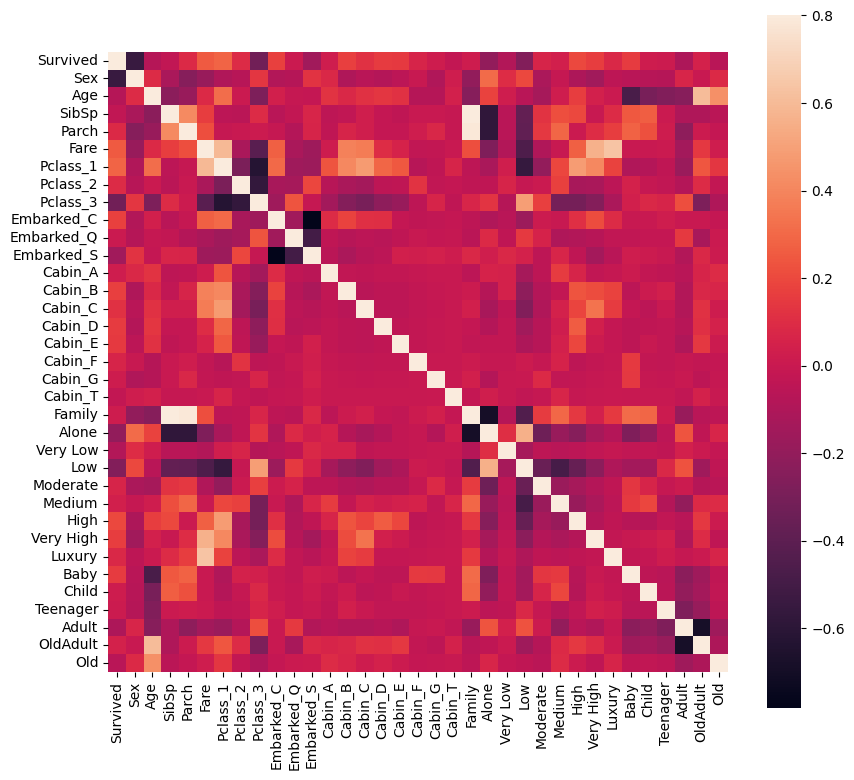

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# FEATURE CORRELATION MATRIX
corrmat = preproc_data.corr()
fig = plt.figure(figsize = (10, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Most of the features are not correlated with each other, which is good for our model.

Correlated features in supervised learning can introduce **multicollinearity**, leading to instability in model estimates, reduced interpretability, increased variance, and loss of generalization.

# **V. Training the Models**

Our training process will be:

1.   Defining the Features and Target Variable
2.   Splitting the Data into Training and Testing Set
3.   Training the Classification Models
4.   Calculating Model Accuracy
5.   Choosing the Best Model

Classification models we will use:

*   Logistic Regression
*   Support Vector Machine
*   K-Nearest Neighbors
*   Random Forest Classifier
*   Gradient Boosting Classifier

This is only an initial training step; we still need to tune the best model's hyperparameters.




In [12]:
from sklearn.model_selection import train_test_split

# DEFINE THE FEATURES (X) AND THE TARGET VARIABLE (y)
X = preproc_data.drop('Survived', axis=1)
y = preproc_data['Survived']

# SPLITTING THE DATA INTO TRAIN AND TEST SETS (80% TRAIN - 20% TEST)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# INITIALIZE CLASSIFIERS
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# DICTIONARY TO STORE RESULTS
results = {'Classifier': [],
          'Test Accuracy': [],
          'Total Errors': [],
          'Precision': [],
          'Recall': [],
          'F1 Score': [],
          'MCC': []}

# ITERATE OVER CLASSIFIERS
for clf_name, clf in classifiers.items():

    # FIT THE MODEL
    clf.fit(X_train, y_train)

    # PREDICT ON TEST SET
    y_pred = clf.predict(X_test)

    # CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
    accuracy = accuracy_score(y_test, y_pred)
    errors = (y_pred != y_test).sum()
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # STORE RESULTS
    results['Classifier'].append(clf_name)
    results['Test Accuracy'].append(accuracy)
    results['Total Errors'].append(errors)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)
    results['MCC'].append(mcc)

# CREATE DATAFRAME FROM RESULTS
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# DISPLAY THE RESULTS
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Classifier,Test Accuracy,Total Errors,Precision,Recall,F1 Score,MCC
0,Gradient Boosting,0.831461,30,0.826087,0.760000,0.791667,0.652164
1,Logistic Regression,0.825843,31,0.789474,0.800000,0.794702,0.643537
2,Random Forest,0.820225,32,0.772152,0.813333,0.792208,0.634645
3,KNN,0.719101,50,0.681159,0.626667,0.652778,0.418639
4,SVM,0.685393,56,0.787879,0.346667,0.481481,0.354123


The following are the metrics that we used to interpret our results:

**Accuracy** - shows how often a model is correct overall.

**Precision** - shows how often a model is correct when predicting the target class.

**Recall** - shows whether a model can find all objects of the target class.

**F1 Score** - provides a balance between precision and recall, making it a more comprehensive metric for evaluating a model. The closer to 1, the better the balance.

**Matthew's Correlation Coefficient** - measures the difference between the predicted values and actual values.

# **VI. Tuning the Best Model**

Upon our initial training, we found that Gradient Boosting, Logistic Regression and Random Forest achieved high accuracy.

Our next step will be to further enhance their performance by tuning their hyperparameters.

By using **Grid Search Cross-Validation** we can find the optimal combination of hyperparameters for a given model.

We will also use **Decision Tree Classifier** as a base for the tuning step since it is more efficient to use than ensemble methods.



In [36]:
# DICTIONARY TO STORE TUNING RESULTS
tuning_results = {'Classifier': [],
                  'Best Accuracy': [],
                  'Test Accuracy': [],
                  'Total Errors': [],
                  'Precision': [],
                  'Recall': [],
                  'F1 Score': [],
                  'MCC': []}

In [ ]:
# IMPORTING TOOLS AND METHODS
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
"""
DECISION TREE CLASSIFIER
"""

# DEFINE THE PARAMETER GRID
param_grid_dt = {
  'criterion': ['gini', 'entropy'],
  'splitter': ['best', 'random'],
  'max_depth': range(8, 13),
  'min_samples_split': range(6, 11),
  'min_samples_leaf': range(1, 4),
  'max_features': ['sqrt', 'log2', None],
  'random_state': [0],
  'max_leaf_nodes': range(80, 101, 2),
  'class_weight': [{0: 1, 1: w} for w in np.linspace(1.3, 1.7, 5)],
  'ccp_alpha': np.linspace(4e-05, 6e-05, 5)
}

# INITIALIZE DECISION TREE CLASSIFIER
dt_classifier = DecisionTreeClassifier()

# INSTANTIATE GRIDSEARCHCV
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# FIT GRIDSEARCHCV
grid_search_dt.fit(X_train, y_train)

# DISPLAY THE BEST PARAMETERS
print("\nBest Parameters found:")
print(grid_search_dt.best_params_)

# PREDICT
dt_ypred = grid_search_dt.best_estimator_.predict(X_test)

# CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
dt_accuracy = accuracy_score(y_test, dt_ypred)
dt_errors = (dt_ypred != y_test).sum()
dt_prec = precision_score(y_test, dt_ypred)
dt_rec = recall_score(y_test, dt_ypred)
dt_f1 = f1_score(y_test, dt_ypred)
dt_mcc = matthews_corrcoef(y_test, dt_ypred)

# STORE RESULTS
tuning_results['Classifier'].append('Decision Tree Classifier')
tuning_results['Best Accuracy'].append(grid_search_dt.best_score_)
tuning_results['Test Accuracy'].append(dt_accuracy)
tuning_results['Total Errors'].append(dt_errors)
tuning_results['Precision'].append(dt_prec)
tuning_results['Recall'].append(dt_rec)
tuning_results['F1 Score'].append(dt_f1)
tuning_results['MCC'].append(dt_mcc)

Fitting 5 folds for each of 247500 candidates, totalling 1237500 fits

Best Parameters found:
{'ccp_alpha': 4e-05, 'class_weight': {0: 1, 1: 1.5}, 'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'max_leaf_nodes': 80, 'min_samples_leaf': 3, 'min_samples_split': 7, 'random_state': 0, 'splitter': 'random'}


In [39]:
# CREATE A DICTIONARY OF THE BASE MODEL'S BEST PARAMETERS FOUND
base_params = {
  'criterion': 'gini',
  'splitter': 'random',
  'max_depth': 11,
  'min_samples_split': 7,
  'min_samples_leaf': 3,
  'max_features': None,
  'random_state': 0,
  'max_leaf_nodes': 80,
  'class_weight': {0: 1, 1: 1.5},
  'ccp_alpha': 4e-05
}

After finding the best parameters, we will now tune these ensemble methods with the Decision Tree as the **base model**:
*   Bagging Classifier
*   Extra Trees Classifier
*   Random Forest Classifier
*   Gradient Boosting Classifier
*   Logistic Regression



In [40]:
# IMPORTING THE MODELS TO TUNE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
"""
BAGGING CLASSIFIER
"""

# DEFINE THE PARAMETER GRID
param_grid_bagging = {
  'n_estimators': range(50, 351, 50),
  'max_samples': [0.5, 0.7, 1.0],
  'max_features': [0.5, 0.7, 1.0]
}

# INITIALIZE THE BASE MODEL
base_model = DecisionTreeClassifier(**base_params)

# CREATE BAGGING CLASSIFIER
bagging_model = BaggingClassifier(estimator=base_model, random_state=0)

# INSTANSIATE GRIDSEARCHCV
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# FIT GRIDSEARCHCV
grid_search_bagging.fit(X_train, y_train)

# PREDICT
bc_ypred = grid_search_bagging.best_estimator_.predict(X_test)

# CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
bc_accuracy = accuracy_score(y_test, bc_ypred)
bc_errors = (bc_ypred != y_test).sum()
bc_prec = precision_score(y_test, bc_ypred)
bc_rec = recall_score(y_test, bc_ypred)
bc_f1 = f1_score(y_test, bc_ypred)
bc_mcc = matthews_corrcoef(y_test, bc_ypred)

# STORE RESULTS
tuning_results['Classifier'].append('Bagging Classifier')
tuning_results['Best Accuracy'].append(grid_search_bagging.best_score_)
tuning_results['Test Accuracy'].append(bc_accuracy)
tuning_results['Total Errors'].append(bc_errors)
tuning_results['Precision'].append(bc_prec)
tuning_results['Recall'].append(bc_rec)
tuning_results['F1 Score'].append(bc_f1)
tuning_results['MCC'].append(bc_mcc)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


In [42]:
"""
EXTRA TREES CLASSIFIER
"""

# DEFINE THE PARAMETER GRID
param_grid_et = {
  'n_estimators': range(50, 351, 50),
  'max_features': ['sqrt', 'log2', None]
}

# CREATE EXTRA TREES CLASSIFIER WITH THE BASE PARAMETERS
et_model = ExtraTreesClassifier(
  criterion=base_params['criterion'],
  max_depth=base_params['max_depth'],
  min_samples_split=base_params['min_samples_split'],
  min_samples_leaf=base_params['min_samples_leaf'],
  max_leaf_nodes=base_params['max_leaf_nodes'],
  class_weight=base_params['class_weight'],
  ccp_alpha=base_params['ccp_alpha'],
  random_state=0
)

# INSTANSIATE GRIDSEARCHCV
grid_search_et = GridSearchCV(estimator=et_model, param_grid=param_grid_et, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# FIT GRIDSEARCHCV
grid_search_et.fit(X_train, y_train)

# PREDICT
et_ypred = grid_search_et.best_estimator_.predict(X_test)

# CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
et_accuracy = accuracy_score(y_test, et_ypred)
et_errors = (et_ypred != y_test).sum()
et_prec = precision_score(y_test, et_ypred)
et_rec = recall_score(y_test, et_ypred)
et_f1 = f1_score(y_test, et_ypred)
et_mcc = matthews_corrcoef(y_test, et_ypred)

# STORE RESULTS
tuning_results['Classifier'].append('Extra Trees Classifier')
tuning_results['Best Accuracy'].append(grid_search_et.best_score_)
tuning_results['Test Accuracy'].append(et_accuracy)
tuning_results['Total Errors'].append(et_errors)
tuning_results['Precision'].append(et_prec)
tuning_results['Recall'].append(et_rec)
tuning_results['F1 Score'].append(et_f1)
tuning_results['MCC'].append(et_mcc)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [43]:
"""
RANDOM FOREST CLASSIFIER
"""

# DEFINE THE PARAMETER GRID
param_grid_rf = {
  'n_estimators': range(60, 361, 50),
  'max_features': ['sqrt', 'log2', None]
}

# CREATE RANDOM FOREST CLASSIFIER WITH THE BASE PARAMETERS
rf_model = RandomForestClassifier(
  criterion=base_params['criterion'],
  max_depth=base_params['max_depth'],
  min_samples_split=base_params['min_samples_split'],
  min_samples_leaf=base_params['min_samples_leaf'],
  max_leaf_nodes=base_params['max_leaf_nodes'],
  class_weight=base_params['class_weight'],
  ccp_alpha=base_params['ccp_alpha'],
  random_state=0
)

# INSTANSIATE GRIDSEARCHCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# FIT GRIDSEARCHCV
grid_search_rf.fit(X_train, y_train)

# PREDICT
rf_ypred = grid_search_rf.best_estimator_.predict(X_test)

# CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
rf_accuracy = accuracy_score(y_test, rf_ypred)
rf_errors = (rf_ypred != y_test).sum()
rf_prec = precision_score(y_test, rf_ypred)
rf_rec = recall_score(y_test, rf_ypred)
rf_f1 = f1_score(y_test, rf_ypred)
rf_mcc = matthews_corrcoef(y_test, rf_ypred)

# STORE RESULTS
tuning_results['Classifier'].append('Random Forest Classifier')
tuning_results['Best Accuracy'].append(grid_search_rf.best_score_)
tuning_results['Test Accuracy'].append(rf_accuracy)
tuning_results['Total Errors'].append(rf_errors)
tuning_results['Precision'].append(rf_prec)
tuning_results['Recall'].append(rf_rec)
tuning_results['F1 Score'].append(rf_f1)
tuning_results['MCC'].append(rf_mcc)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [49]:
"""
GRADIENT BOOSTING CLASSIFIER
"""

# DEFINE THE PARAMETER GRID
param_grid_gb = {
  'n_estimators': range(60, 361, 50),
  'max_features': ['sqrt', 'log2', None],
  'learning_rate': np.linspace(0.01, 0.1, 5),
  'criterion': ['friedman_mse', 'squared_error']
}

# CREATE GRADIENT BOOSTING CLASSIFIER WITH THE BASE PARAMETERS
gb_model = GradientBoostingClassifier(
  max_depth=base_params['max_depth'],
  min_samples_split=base_params['min_samples_split'],
  min_samples_leaf=base_params['min_samples_leaf'],
  max_leaf_nodes=base_params['max_leaf_nodes'],
  ccp_alpha=base_params['ccp_alpha'],
  random_state=0
)

# INSTANSIATE GRIDSEARCHCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# FIT GRIDSEARCHCV
grid_search_gb.fit(X_train, y_train)

# PREDICT
gb_ypred = grid_search_gb.best_estimator_.predict(X_test)

# CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
gb_accuracy = accuracy_score(y_test, gb_ypred)
gb_errors = (gb_ypred != y_test).sum()
gb_prec = precision_score(y_test, gb_ypred)
gb_rec = recall_score(y_test, gb_ypred)
gb_f1 = f1_score(y_test, gb_ypred)
gb_mcc = matthews_corrcoef(y_test, gb_ypred)

# STORE RESULTS
tuning_results['Classifier'].append('Gradient Boosting Classifier')
tuning_results['Best Accuracy'].append(grid_search_gb.best_score_)
tuning_results['Test Accuracy'].append(gb_accuracy)
tuning_results['Total Errors'].append(gb_errors)
tuning_results['Precision'].append(gb_prec)
tuning_results['Recall'].append(gb_rec)
tuning_results['F1 Score'].append(gb_f1)
tuning_results['MCC'].append(gb_mcc)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


In [50]:
"""
LOGISTIC REGRESSION
"""

# DEFINE THE PARAMETER GRID
param_grid_lr = {
  'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
  'max_iter': [50, 100, 150]
}

# CREATE LOGISTIC REGRESSION WITH THE BASE PARAMETERS
lr_model = LogisticRegression(
  class_weight=base_params['class_weight'],
  random_state=0
)

# INSTANSIATE GRIDSEARCHCV
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# FIT GRIDSEARCHCV
grid_search_lr.fit(X_train, y_train)

# PREDICT
lr_ypred = grid_search_lr.best_estimator_.predict(X_test)

# CALCULATE ACCURACY, ERRORS, PRECISION, RECALL, F1 AND MCC
lr_accuracy = accuracy_score(y_test, lr_ypred)
lr_errors = (lr_ypred != y_test).sum()
lr_prec = precision_score(y_test, lr_ypred)
lr_rec = recall_score(y_test, lr_ypred)
lr_f1 = f1_score(y_test, lr_ypred)
lr_mcc = matthews_corrcoef(y_test, lr_ypred)

# STORE RESULTS
tuning_results['Classifier'].append('Logistic Regression')
tuning_results['Best Accuracy'].append(grid_search_lr.best_score_)
tuning_results['Test Accuracy'].append(lr_accuracy)
tuning_results['Total Errors'].append(lr_errors)
tuning_results['Precision'].append(lr_prec)
tuning_results['Recall'].append(lr_rec)
tuning_results['F1 Score'].append(lr_f1)
tuning_results['MCC'].append(lr_mcc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# DISPLAY THE BEST PARAMETERS FOR EACH METHOD
print("\nBagging Classifier Best Parameters found:")
print(grid_search_bagging.best_params_)
print("\nExtra Trees Classifier Best Parameters found:")
print(grid_search_et.best_params_)
print("\nRandom Forest Classifier Best Parameters found:")
print(grid_search_rf.best_params_)
print("\nGradient Boosting Classifier Best Parameters found:")
print(grid_search_gb.best_params_)
print("\nLogistic Regression Best Parameters found:")
print(grid_search_lr.best_params_)

# CREATE DATAFRAME FROM TUNING RESULTS
tuning_results_df = pd.DataFrame(tuning_results).sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# DISPLAY THE TUNING RESULTS
tuning_results_df


Bagging Classifier Best Parameters found:
{'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 150}

Extra Trees Classifier Best Parameters found:
{'max_features': None, 'n_estimators': 150}

Random Forest Classifier Best Parameters found:
{'max_features': None, 'n_estimators': 60}

Gradient Boosting Classifier Best Parameters found:
{'criterion': 'squared_error', 'learning_rate': 0.01, 'max_features': 'sqrt', 'n_estimators': 160}

Logistic Regression Best Parameters found:
{'max_iter': 150, 'solver': 'lbfgs'}


,Classifier,Best Accuracy,Test Accuracy,Total Errors,Precision,Recall,F1 Score,MCC
0,Extra Trees Classifier,0.803053,0.842697,28,0.790123,0.853333,0.820513,0.682479
1,Decision Tree Classifier,0.804472,0.837079,29,0.787500,0.840000,0.812903,0.669983
2,Bagging Classifier,0.805919,0.837079,29,0.819444,0.786667,0.802721,0.664465
3,Random Forest Classifier,0.812912,0.837079,29,0.810811,0.800000,0.805369,0.665328
4,Logistic Regression,0.797439,0.837079,29,0.787500,0.840000,0.812903,0.669983
5,Gradient Boosting Classifier,0.822781,0.831461,30,0.846154,0.733333,0.785714,0.652497


The best classification model is **Extra Trees Classifier** with test accuracy of **84.26%**.

# **VII. Final Training**

After finding the best classification model to use, we will now train it with the whole dataset **without splitting**.

In [60]:
# IMPORTING THE DATASET
whole_data = pd.read_csv('titanic_train.csv')
data_processed = preprocess(whole_data)

# DEFINE THE FEATURES (X) AND THE TARGET VARIABLE (y)
X = data_processed.drop('Survived', axis=1)
y = data_processed['Survived']

In [61]:
"""
EXTRA TREES CLASSIFIER BEST PARAMETERS

base_params = {
  'criterion': 'gini',
  'splitter': 'random',
  'max_depth': 11,
  'min_samples_split': 7,
  'min_samples_leaf': 3,
  'max_features': None,
  'random_state': 0,
  'max_leaf_nodes': 80,
  'class_weight': {0: 1, 1: 1.5},
  'ccp_alpha': 4e-05
}

Extra Trees Classifier Best Parameters found:
{'max_features': None, 'n_estimators': 150}
"""

# TRAIN THE MODEL USING THE TUNED PARAMETERS
final_model = ExtraTreesClassifier(
  criterion='gini',
  max_depth=11,
  min_samples_split=7,
  min_samples_leaf=3,
  max_leaf_nodes=80,
  class_weight={0: 1, 1: 1.5},
  ccp_alpha=4e-05,
  random_state=0,
  max_features=None,
  n_estimators=150
)

final_model.fit(X, y)

ExtraTreesClassifier(ccp_alpha=4e-05, class_weight={0: 1, 1: 1.5}, max_depth=11,
                     max_features=None, max_leaf_nodes=80, min_samples_leaf=3,
                     min_samples_split=7, n_estimators=150, random_state=0)

# **VIII. Saving the Model**

We will save the model in a **pickle file** (.pkl) so that it can be used in the future without the need to train it again.

In [62]:
import pickle

# SAVE MODEL
with open('model.pkl','wb') as f:
    pickle.dump(rf_model,f)

# **IX. Loading and Using the Model**

In [ ]:
# LOAD MODEL
model = pickle.load(open('model.pkl', 'rb'))

We will be using a different preprocessing function for the input data since we will be dealing with a **single vector** for prediction.

In [ ]:
def preprocess_input(df):

    # DROP UNNECESSARY COLUMNS
    df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

    # CONVERT SEX TO BINARY
    df['Sex'] = (df['Sex'] == 'Male').astype(int)

    # CREATE PCLASS CATEGORIES COLUMNS
    df['Pclass_1'] = (df['Pclass'] == "1").astype(int)
    df['Pclass_2'] = (df['Pclass'] == "2").astype(int)
    df['Pclass_3'] = (df['Pclass'] == "3").astype(int)

    # CREATE EMBARKED CATEGORIES COLUMNS
    df['Embarked_C'] = (df['Embarked'] == 'C').astype(int)
    df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)
    df['Embarked_S'] = (df['Embarked'] == 'S').astype(int)

    # CREATE CABIN CATEGORIES COLUMNS
    df['Cabin_A'] = (df['Cabin'] == 'A').astype(int)
    df['Cabin_B'] = (df['Cabin'] == 'B').astype(int)
    df['Cabin_C'] = (df['Cabin'] == 'C').astype(int)
    df['Cabin_D'] = (df['Cabin'] == 'D').astype(int)
    df['Cabin_E'] = (df['Cabin'] == 'E').astype(int)
    df['Cabin_F'] = (df['Cabin'] == 'F').astype(int)
    df['Cabin_G'] = (df['Cabin'] == 'G').astype(int)
    df['Cabin_T'] = (df['Cabin'] == 'T').astype(int)

    # DROP ORIGINAL PCLASS AND EMBARKED COLUMNS
    df = df.drop(['Pclass', 'Embarked', 'Cabin'], axis = 1)

    # CREATE FAMILY COLUMN BY ADDING PARENT AND SIBLING COLUMNS
    df['Family'] = df['Parch'] + df['SibSp']

    # CREATE ALONE COLUMN
    df['Alone'] = (df['Family'] == 0).astype(int)

    # CREATE FARE CLASSES
    df['Very Low'] = (df['Fare'] <= 4).astype(int)
    df['Low'] = ((df['Fare'] > 4) & (df['Fare'] <= 15)).astype(int)
    df['Moderate'] = ((df['Fare'] > 15) & (df['Fare'] <= 25)).astype(int)
    df['Medium'] = ((df['Fare'] > 25) & (df['Fare'] <= 50)).astype(int)
    df['High'] = ((df['Fare'] > 50) & (df['Fare'] <= 100)).astype(int)
    df['Very High'] = ((df['Fare'] > 100) & (df['Fare'] <= 250)).astype(int)
    df['Luxury'] = (df['Fare'] > 250).astype(int)

    # CREATE AGE CATEGORIES
    df['Baby'] = (df['Age'] <= 5).astype(int)
    df['Child'] = ((df['Age'] > 5) & (df['Age'] <= 14)).astype(int)
    df['Teenager'] = ((df['Age'] > 14) & (df['Age'] <= 18)).astype(int)
    df['Adult'] = ((df['Age'] > 18) & (df['Age'] <= 30)).astype(int)
    df['OldAdult'] = ((df['Age'] > 30) & (df['Age'] <= 60)).astype(int)
    df['Old'] = (df['Age'] > 60).astype(int)

    final_df = df.copy()

    return final_df

In [ ]:
Pclass = "1" # @param ["1", "2", "3"]
Name = 'John Smith' # @param {type:"string"}
Sex = 'Male' # @param ["Male", "Female"]
Age = 40 # @param {type:"integer"}
SibSp = 0 # @param {type:"integer"}
Parch = 0 # @param {type:"integer"}
Cabin = 'D' # @param ["A", "B", "C", "D", "E", "F", "G", "T"]
Embarked = 'Southampton' # @param ["Cherbourg", "Queenstown", "Southampton"]

In [ ]:
input = {
    'PassengerId': [1], # PREDEFINED VALUE
    'Pclass': [Pclass],
    'Name': [Name],
    'Sex': [Sex],
    'Age': [Age],
    'SibSp': [SibSp],
    'Parch': [Parch],
    'Ticket': ['A'], # PREDEFINED VALUE
    'Fare': [32.20], # MEAN OF FARE COLUMN
    'Cabin': [Cabin],
    'Embarked': [Embarked[0]]
}

input_df = pd.DataFrame(input)
input_final = preprocess_input(input_df)

ypred = model.predict(input_final)

if ypred[0] == 0:
  print("You will not survive!")
else:
  print("You will survive!")

You will not survive!


# **X. Conclusion**

Upon comprehensive evaluation and fine-tuning of all models, the **Extra Tree Classifier** emerged as the most performant. It demonstrated an accuracy rate of **84.26%**, alongside precision of 79%, recall of 85%, F1-score of 82.05%, and Matthews correlation coefficient (MCC) of 68.24%.